In [1]:
!git clone https://github.com/LizaDerb/probing_compositionality

fatal: destination path 'probing_compositionality' already exists and is not an empty directory.


In [2]:
import pandas as pd

# Подготовка данных

In [3]:
rus = pd.read_csv('/content/probing_compositionality/data/rus/extended_vp_corpus.csv', sep=';')
eng = pd.read_csv('/content/probing_compositionality/data/eng/eng_corpus.csv')

Одно и то же выражение имеет и буквальное, и идиоматическое употребление. Все выражения - VP.

In [4]:
eng = eng[['mwe', 'label', 'sentence']]
rus = rus[['mwe', 'label', 'short_sentence']].rename(columns={'short_sentence' : 'sentence'})

In [5]:
eng.head()

,mwe,label,sentence
0,blow_smoke,L,"Anyway, Jack The Lad said, rehearsing, and ble..."
1,blow_smoke,L,"She's lying on the bed, blowing smoke at the c..."
2,blow_smoke,L,His father leaned back and blew smoke towards ...
3,blow_smoke,L,"Let us blow smoke at each other, you and I."
4,blow_smoke,L,"Let us blow smoke at each other, you and I. Sm..."


Удалим примеры с лейблом unknown

In [6]:
eng = eng[eng['label'] != 'Q']

<Axes: xlabel='mwe'>

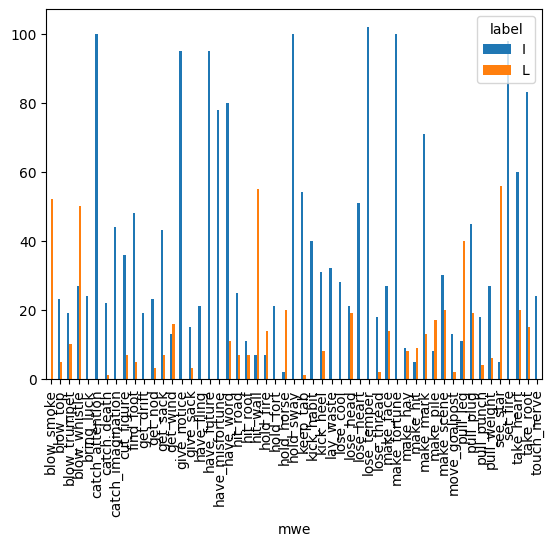

In [7]:
eng.groupby(['mwe', 'label']).size().unstack().plot(kind='bar')

<Axes: xlabel='mwe'>

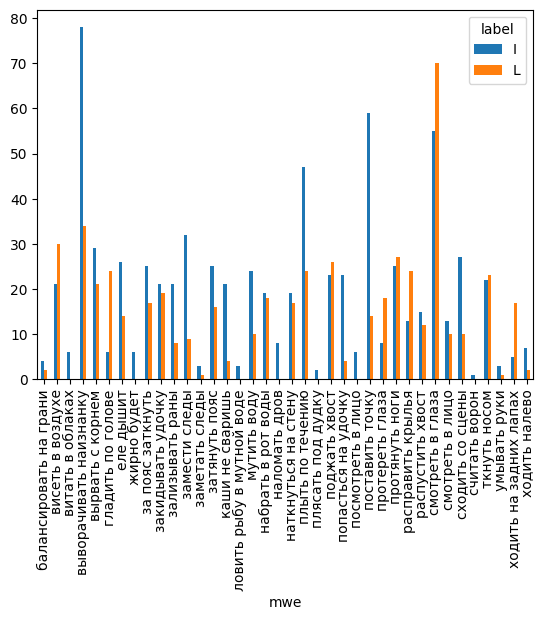

In [8]:
rus.groupby(['mwe', 'label']).size().unstack().plot(kind='bar')

## Делим на test и train

In [9]:
num_idiom = rus['mwe'].value_counts()
num_idiom

mwe
смотреть в глаза             125
выворачивать наизнанку       112
поставить точку               73
плыть по течению              71
протянуть ноги                52
висеть в воздухе              51
вырвать с корнем              50
поджать хвост                 49
ткнуть носом                  45
за пояс заткнуть              42
замести следы                 41
затянуть пояс                 41
закидывать удочку             40
еле дышит                     40
набрать в рот воды            37
сходить со сцены              37
расправить крылья             37
наткнуться на стену           36
мутить воду                   34
гладить по голове             30
зализывать раны               29
попасться на удочку           27
распустить хвост              27
протереть глаза               26
каши не сваришь               25
смотреть в лицо               23
ходить на задних лапах        22
ходить налево                  9
наломать дров                  8
жирно будет                    6
баланс

In [10]:
len(num_idiom)

38

In [11]:
idiom_train = num_idiom[:14].index.tolist()
idiom_test = num_idiom[14:].index.tolist()

In [12]:
rus_train = rus[rus['mwe'].isin(idiom_train)]
rus_test = rus[rus['mwe'].isin(idiom_test)]

In [13]:
rus_train = rus_train.dropna()

In [14]:
rus_train

,mwe,label,sentence
36,поставить точку,I,30 июня 1994 года я выступила в газете Диена с...
37,поставить точку,I,BRА потом я ушел в тяжелой тоске. Тут бы надо ...
38,поставить точку,I,"Надо, так сказать, поставить точку на первой ..."
39,поставить точку,I,"- Переехать в богадельню - значит, самой поста..."
40,поставить точку,I,"Все, решил - еду в Мадрид. Настало время поста..."
...,...,...,...
1252,ткнуть носом,L,-Но волчица лишь тихо ткнула носом неугомонног...
1253,ткнуть носом,L,-Но волчица лишь тихо ткнула носом неугомонног...
1254,ткнуть носом,I,Но сейчас судьба бесцеремонно ткнула носом в с...
1255,ткнуть носом,L,"Лысый сноровисто сдёрнул рюкзак, отстегнул с е..."


In [15]:
print('train: ', len(rus_train))
print('test: ', len(rus_test))

train:  830
test:  445


In [16]:
num_idiom_eng = eng['mwe'].value_counts()
num_idiom_eng

mwe
lose_temper          102
hold_sway            100
make_fortune         100
catch_attention      100
take_root             98
set_fire              98
give_notice           95
have_future           95
have_word             91
make_mark             84
take_heart            80
have_misfortune       78
blow_whistle          77
pull_plug             64
hit_wall              62
see_star              61
keep_tab              55
find_foot             53
blow_smoke            52
pull_leg              51
lose_heart            51
get_sack              50
make_scene            50
catch_imagination     44
cut_figure            43
make_face             41
lose_head             40
kick_habit            40
kick_heel             39
pull_weight           33
hit_road              32
lay_waste             32
blow_trumpet          29
get_wind              29
lose_cool             28
blow_top              28
get_nod               26
make_pile             25
bring_luck            24
touch_nerve          

In [17]:
len(num_idiom_eng)

53

Датасет очень несбалансированный по классам, так что мы удалим некоторые примеры с I

In [18]:
inx = eng[eng['label'] == 'I'].index.tolist()[::2]

In [19]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2555 entries, 0 to 2966
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   mwe       2555 non-null   object
 1   label     2555 non-null   object
 2   sentence  2555 non-null   object
dtypes: object(3)
memory usage: 79.8+ KB


In [20]:
eng = eng.drop(index=inx)

In [21]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1550 entries, 0 to 2962
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   mwe       1550 non-null   object
 1   label     1550 non-null   object
 2   sentence  1550 non-null   object
dtypes: object(3)
memory usage: 48.4+ KB


In [22]:
idiom_train_eng = num_idiom_eng[:25].index.tolist()
idiom_test_eng = num_idiom_eng[25:].index.tolist()

In [23]:
eng_train = eng[eng['mwe'].isin(idiom_train_eng)]
eng_test = eng[eng['mwe'].isin(idiom_test_eng)]

In [24]:
print('train: ', len(eng_train))
print('test: ', len(eng_test))

train:  1102
test:  448


## Распределение I и L

In [25]:
stat_train_eng = eng_train['label'].value_counts().rename('num').to_frame()
stat_train_eng['percentage'] = (stat_train_eng.num * 100 / stat_train_eng.num.sum()).round(1).astype(str) + '%'
stat_train_eng

,num,percentage
label,,
I,731,66.3%
L,371,33.7%


In [26]:
stat_test_eng = eng_test['label'].value_counts().rename('num').to_frame()
stat_test_eng['percentage'] = (stat_test_eng.num * 100 / stat_test_eng.num.sum()).round(1).astype(str) + '%'
stat_test_eng

,num,percentage
label,,
I,273,60.9%
L,175,39.1%


In [27]:
stat_train_rus = rus_train['label'].value_counts().rename('num').to_frame()
stat_train_rus['percentage'] = (stat_train_rus.num * 100 / stat_train_rus.num.sum()).round(1).astype(str) + '%'
stat_train_rus

,num,percentage
label,,
I,488,58.8%
L,342,41.2%


In [28]:
stat_test_rus = rus_test['label'].value_counts().rename('num').to_frame()
stat_test_rus['percentage'] = (stat_test_rus.num * 100 / stat_test_rus.num.sum()).round(1).astype(str) + '%'
stat_test_rus

,num,percentage
label,,
I,263,59.1%
L,182,40.9%


In [ ]:
!pip install datasets

In [30]:
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder

In [31]:
train_eng = Dataset.from_pandas(eng_train)
test_eng = Dataset.from_pandas(eng_test)


train_rus = Dataset.from_pandas(rus_train)
test_rus = Dataset.from_pandas(rus_test)

In [32]:
le = LabelEncoder()
le.fit(train_eng['label'])

LabelEncoder()

In [33]:
train_labels_eng = le.transform(train_eng['label'])
test_labels_eng = le.transform(test_eng['label'])

train_labels_rus = le.transform(train_rus['label'])
test_labels_rus = le.transform(test_rus['label'])

In [34]:
train_eng

Dataset({
    features: ['mwe', 'label', 'sentence', '__index_level_0__'],
    num_rows: 1102
})

In [35]:
train_rus

Dataset({
    features: ['mwe', 'label', 'sentence', '__index_level_0__'],
    num_rows: 830
})

# MultilingualBert

In [36]:
import seaborn as sns
from tqdm.notebook import tqdm
import numpy as np
import warnings
import random
import pickle

import torch
from torch.utils.data import DataLoader

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn import preprocessing
from transformers import AutoTokenizer, AutoModel

In [37]:
tokenizer = AutoTokenizer.from_pretrained('DeepPavlov/bert-base-multilingual-cased-sentence')
bert = AutoModel.from_pretrained('DeepPavlov/bert-base-multilingual-cased-sentence')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/711M [00:00<?, ?B/s]

In [38]:
torch.cuda.is_available()

True

In [39]:
device_cuda = torch.device("cuda")
device_cpu = torch.device("cpu")

In [40]:
def vectorize_dataset(data, tokenizer, model):
    model = model.to(device_cuda)
    res_cls = []
    res_mean = []
    for batch in tqdm(data):
        toks = tokenizer(batch['sentence'], padding='max_length', truncation=True, return_tensors='pt', max_length=300)
        with torch.no_grad():
            model_output = model(**{k: v.to(model.device) for k, v in toks.items()})
        res_cls.append(model_output.last_hidden_state[:,0,:]) #достаём вектора для CLS токенов
        res_mean.append(torch.mean(model_output.last_hidden_state, dim=1)) #среднее
    res_cls = torch.vstack(res_cls)
    res_mean = torch.vstack(res_mean)
    return res_cls.detach().cpu().numpy(), res_mean.detach().cpu().numpy()

In [41]:
dl_train_eng = DataLoader(train_eng, batch_size=256, shuffle=False,
                drop_last=False)
dl_test_eng = DataLoader(test_eng, batch_size=256, shuffle=False,
                drop_last=False)
vecs_train_cls_eng, vecs_train_mean_eng = vectorize_dataset(dl_train_eng, tokenizer, bert)
vecs_test_cls_eng, vecs_test_mean_eng = vectorize_dataset(dl_test_eng, tokenizer, bert)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [42]:
dl_train_rus = DataLoader(train_rus, batch_size=256, shuffle=False,
                drop_last=False)
dl_test_rus = DataLoader(test_rus, batch_size=256, shuffle=False,
                drop_last=False)
vecs_train_cls_rus, vecs_train_mean_rus = vectorize_dataset(dl_train_rus, tokenizer, bert)
vecs_test_cls_rus, vecs_test_mean_rus = vectorize_dataset(dl_test_rus, tokenizer, bert)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [43]:
vectors_eng = {'vecs_train_cls_eng' : vecs_train_cls_eng, 'vecs_train_mean_eng' : vecs_train_mean_eng,
           'vecs_test_cls_eng' : vecs_test_cls_eng, 'vecs_test_mean_eng' : vecs_test_mean_eng}

for name in vectors_eng.keys():
    with open(f'{name}.pkl', 'wb') as file:
         pickle.dump(vectors_eng[name], file)

In [44]:
vector_names_eng = ['vecs_train_cls_eng', 'vecs_train_mean_eng', 'vecs_test_cls_eng', 'vecs_test_mean_eng']
vecs_eng = []

for name in vector_names_eng:
    with open(f'{name}.pkl', "rb") as fIn:
        vecs_eng.append(pickle.load(fIn))

train_cls_eng = vecs_eng[0]
train_mean_eng = vecs_eng[1]
test_cls_eng = vecs_eng[2]
test_mean_eng = vecs_eng[3]

In [45]:
vectors_rus = {'vecs_train_cls_rus' : vecs_train_cls_rus, 'vecs_train_mean_rus' : vecs_train_mean_rus,
           'vecs_test_cls_rus' : vecs_test_cls_rus, 'vecs_test_mean_rus' : vecs_test_mean_rus}

for name in vectors_rus.keys():
    with open(f'{name}.pkl', 'wb') as file:
         pickle.dump(vectors_rus[name], file)

In [46]:
vector_names_rus = ['vecs_train_cls_rus', 'vecs_train_mean_rus', 'vecs_test_cls_rus', 'vecs_test_mean_rus']
vecs_rus = []

for name in vector_names_rus:
    with open(f'{name}.pkl', "rb") as fIn:
        vecs_rus.append(pickle.load(fIn))

train_cls_rus = vecs_rus[0]
train_mean_rus = vecs_rus[1]
test_cls_rus = vecs_rus[2]
test_mean_rus = vecs_rus[3]

In [47]:
train_cls_eng.shape

(1102, 768)

In [48]:
test_mean_rus.shape

(445, 768)

In [49]:
def calculate_metrics(true_labels, predictions):
    matrix = confusion_matrix(true_labels, predictions)
    acc = accuracy_score(true_labels, predictions)
    prec = precision_score(true_labels, predictions)
    rec = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    roc_auc = roc_auc_score(true_labels, predictions)
    return matrix, acc, prec, rec, f1, roc_auc

In [50]:
def baseline_rand_vec(vecs):
    size = vecs.shape[1]
    num_vecs = vecs.shape[0]
    rand_vecs = []
    for _ in range(num_vecs):
        rand_vecs.append(np.random.uniform(-5.0826163,1.5603778,size))
    return rand_vecs

def baseline_rand_pred(vecs, labels):
    num_vecs = vecs.shape[0]
    rand_vecs = []
    rand_pred = np.array(range(num_vecs), dtype=int)
    for i in range(0, num_vecs):
        rand_pred[i] = random.choice(labels)
    return rand_pred

In [51]:
def rand_pred_func(vecs, labels, true_labels, n=50):
    results_rand_pred = []
    for _ in range(n):
        pred_labels = baseline_rand_pred(vecs, labels)
        results_rand_pred.append(calculate_metrics(true_labels, pred_labels))
    res_rand_pred = pd.DataFrame(results_rand_pred, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
    return res_rand_pred

In [52]:
def get_results(train_data, train_labels, test_data, test_labels):
    results_train = []
    results_test = []
    for n in tqdm(range(50)):
        clf = MLPClassifier(random_state=n, max_iter=300, verbose=1)
        clf.fit(train_data, train_labels)
        train_pred = clf.predict(train_data)
        test_pred = clf.predict(test_data)
        results_train.append(calculate_metrics(train_labels, train_pred))
        results_test.append(calculate_metrics(test_labels, test_pred))
    return results_train, results_test, test_pred

In [53]:
labels = [0, 1]

In [54]:
rand_pred_func(test_cls_eng, labels, test_labels_eng).to_csv('res_rand_pred_eng.csv')
rand_pred_func(test_cls_rus, labels, test_labels_rus).to_csv('res_rand_pred_rus.csv')

In [ ]:
rand_vecs_eng = baseline_rand_vec(train_cls_eng)
results_train_rand_eng, results_test_rand_eng, test_rand_eng_pred = get_results(rand_vecs_eng, train_labels_eng, test_cls_eng, test_labels_eng)
res_test_rand_eng = pd.DataFrame(results_test_rand_eng, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
res_train_rand_eng = pd.DataFrame(results_train_rand_eng, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
res_test_rand_eng.to_csv('res_test_rand_vec_eng.csv')
res_train_rand_eng.to_csv('res_train_rand_vec_eng.csv')

In [ ]:
rand_vecs_rus = baseline_rand_vec(train_cls_rus)
results_train_rand_rus, results_test_rand_rus, test_rand_rus_pred = get_results(rand_vecs_rus, train_labels_rus, test_cls_rus, test_labels_rus)
res_test_rand_rus = pd.DataFrame(results_test_rand_rus, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
res_train_rand_rus = pd.DataFrame(results_train_rand_rus, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
res_test_rand_rus.to_csv('res_test_rand_vec_rus.csv')
res_train_rand_rus.to_csv('res_train_rand_vec_rus.csv')

In [ ]:
results_train_mean_eng, results_test_mean_eng, test_mean_eng_pred = get_results(train_mean_eng, train_labels_eng, test_mean_eng, test_labels_eng)
res_test_mean_eng = pd.DataFrame(results_test_mean_eng, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
res_train_mean_eng = pd.DataFrame(results_train_mean_eng, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
res_test_mean_eng.to_csv('res_test_mean_eng.csv')
res_train_mean_eng.to_csv('res_train_mean_eng.csv')

In [58]:
print(classification_report(test_labels_eng, test_mean_eng_pred, target_names=le.classes_))

              precision    recall  f1-score   support

           I       0.71      0.79      0.75       273
           L       0.60      0.50      0.55       175

    accuracy                           0.68       448
   macro avg       0.66      0.64      0.65       448
weighted avg       0.67      0.68      0.67       448



In [ ]:
results_train_mean_rus, results_test_mean_rus, test_mean_rus_pred = get_results(train_mean_rus, train_labels_rus, test_mean_rus, test_labels_rus)
res_test_mean_rus = pd.DataFrame(results_test_mean_rus, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
res_train_mean_rus = pd.DataFrame(results_train_mean_rus, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
res_test_mean_rus.to_csv('res_test_mean_rus.csv')
res_train_mean_rus.to_csv('res_train_mean_rus.csv')

In [60]:
print(classification_report(test_labels_rus, test_mean_rus_pred, target_names=le.classes_))

              precision    recall  f1-score   support

           I       0.81      0.77      0.79       263
           L       0.69      0.74      0.71       182

    accuracy                           0.76       445
   macro avg       0.75      0.75      0.75       445
weighted avg       0.76      0.76      0.76       445



In [ ]:
results_train_cls_eng, results_test_cls_eng, test_cls_eng_pred = get_results(train_cls_eng, train_labels_eng, test_cls_eng, test_labels_eng)
res_test_cls_eng = pd.DataFrame(results_test_cls_eng, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
res_train_cls_eng = pd.DataFrame(results_train_cls_eng, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
res_test_cls_eng.to_csv('res_test_cls_eng.csv')
res_train_cls_eng.to_csv('res_train_cls_eng.csv')

In [62]:
print(classification_report(test_labels_eng, test_cls_eng_pred, target_names=le.classes_))

              precision    recall  f1-score   support

           I       0.70      0.80      0.75       273
           L       0.60      0.46      0.52       175

    accuracy                           0.67       448
   macro avg       0.65      0.63      0.63       448
weighted avg       0.66      0.67      0.66       448



In [ ]:
results_train_cls_rus, results_test_cls_rus, test_cls_rus_pred = get_results(train_cls_rus, train_labels_rus, test_cls_rus, test_labels_rus)
res_test_cls_rus = pd.DataFrame(results_test_cls_rus, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
res_train_cls_rus = pd.DataFrame(results_train_cls_rus, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
res_test_cls_rus.to_csv('res_test_cls_rus.csv')
res_train_cls_rus.to_csv('res_train_cls_rus.csv')

In [64]:
print(classification_report(test_labels_rus, test_cls_rus_pred, target_names=le.classes_))

              precision    recall  f1-score   support

           I       0.82      0.77      0.79       263
           L       0.69      0.75      0.72       182

    accuracy                           0.76       445
   macro avg       0.75      0.76      0.76       445
weighted avg       0.77      0.76      0.76       445



In [ ]:
!zip -r /content/file.zip /content/russian_english